
### Employee Dataset Project
+ Connect to database
+ Put the dataset into dictionary
+ Store the dataset into Excel file
+ Perform data analysis on the dataset



##### **Question 1**
+ ###### connect to the db server
+ ###### add all employee into dictinary by SQL 
+ ###### display a few employees' details

###### Import Library 

In [302]:
import pandas as pd
import numpy as np
import datetime
import seaborn
import matplotlib.pyplot as plt
from operator import itemgetter
import random
import re

###### Connect to the db server


In [170]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='employees',
                                         user='root',
                                         password='10RelationalDatabasesAreVeryUseful!')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)


Connected to MySQL Server version  8.0.30
You're connected to database:  ('employees',)


###### Add all employee into dictinary by SQL query 


In [172]:
emp_Dict = {}
 
SQL = '''SELECT e.emp_no, e.first_name, e.last_name, e.gender, de.dept_name, tt.title, ss.salary , e.birth_date
FROM employees e INNER JOIN (SELECT s.emp_no, s.salary FROM salaries s 
WHERE s.from_date = (SELECT MAX(s2.from_date) FROM salaries s2 WHERE s2.emp_no = s.emp_no)) ss ON e.emp_no = ss.emp_no
LEFT OUTER JOIN (SELECT t.emp_no, t.title FROM titles t 
WHERE t.from_date = (SELECT MAX(t2.from_date) FROM titles t2 WHERE t2.emp_no = t.emp_no)) tt ON e.emp_no = tt.emp_no
LEFT OUTER JOIN (SELECT d.emp_no, d.dept_no FROM dept_emp d 
WHERE d.from_date = (SELECT MAX(d2.from_date) FROM dept_emp d2 WHERE d2.emp_no = d.emp_no)) dd ON e.emp_no = dd.emp_no
LEFT OUTER JOIN departments de ON dd.dept_no = de.dept_no;
'''
data = pd.read_sql_query(SQL, connection)
#display(data)

for i in range(0,len(data.index)):
    record = data.loc[i]
    if record[0] not in emp_Dict.keys():
        value = [ record[1],record[2],record[3], record[4], record[5],record[6],record[7]] 
        emp_Dict[record[0]] = value
        
display(emp_Dict)

{10001: ['Georgi',
  'Facello',
  'M',
  'Development',
  'Senior Engineer',
  88958,
  datetime.date(1953, 9, 2)],
 10002: ['Bezalel',
  'Simmel',
  'F',
  'Sales',
  'Staff',
  72527,
  datetime.date(1964, 6, 2)],
 10003: ['Parto',
  'Bamford',
  'M',
  'Production',
  'Senior Engineer',
  43311,
  datetime.date(1959, 12, 3)],
 10004: ['Chirstian',
  'Koblick',
  'M',
  'Production',
  'Senior Engineer',
  74057,
  datetime.date(1954, 5, 1)],
 10005: ['Kyoichi',
  'Maliniak',
  'M',
  'Human Resources',
  'Senior Staff',
  94692,
  datetime.date(1955, 1, 21)],
 10006: ['Anneke',
  'Preusig',
  'F',
  'Development',
  'Senior Engineer',
  59755,
  datetime.date(1953, 4, 20)],
 10007: ['Tzvetan',
  'Zielinski',
  'F',
  'Research',
  'Senior Staff',
  88070,
  datetime.date(1957, 5, 23)],
 10008: ['Saniya',
  'Kalloufi',
  'M',
  'Development',
  'Assistant Engineer',
  52668,
  datetime.date(1958, 2, 19)],
 10009: ['Sumant',
  'Peac',
  'F',
  'Quality Management',
  'Senior Engineer'

###### Display a few employees’ details


In [173]:


num = np.append(np.array("10001"),emp_Dict[10001])
num2 = np.append(np.array("10002"),emp_Dict[10002])
num3 = np.append(np.array("10003"),emp_Dict[10003])
num4 = np.append(np.array("10004"),emp_Dict[10004])
num5 = np.append(np.array("10005"),emp_Dict[10005])

num = np.concatenate((num, num2, num3, num4, num5),axis=0)
reshaped = num.reshape(5,8)
pd.DataFrame(reshaped, columns=['employee number','first name', 'last name', 'gender', 
                                'current dept name', 'current title', 'current salary' , 'date of birth'])


,employee number,first name,last name,gender,current dept name,current title,current salary,date of birth
0,10001,Georgi,Facello,M,Development,Senior Engineer,88958,1953-09-02
1,10002,Bezalel,Simmel,F,Sales,Staff,72527,1964-06-02
2,10003,Parto,Bamford,M,Production,Senior Engineer,43311,1959-12-03
3,10004,Chirstian,Koblick,M,Production,Senior Engineer,74057,1954-05-01
4,10005,Kyoichi,Maliniak,M,Human Resources,Senior Staff,94692,1955-01-21


##### **Question 2**
+ ###### create a table for birthday count in each month
+ ###### create employee birthday table
+ ###### create and store tables in an Excel spreadsheet

###### Create a table for birthday count in each month: spread sheet 1


In [206]:
Jan=0; Feb=0; Mar=0; Apr=0; May=0; Jun=0; Jul=0; Aug=0; Sep=0; Oct=0; Nov=0; Dec=0;
for key, value in emp_Dict.items():
    if value[6].month == 1:
            Jan += 1
    elif value[6].month == 2:
            Feb += 1
    elif value[6].month == 3:
            Mar += 1
    elif value[6].month == 4:
            Apr += 1
    elif value[6].month == 5:
            May += 1
    elif value[6].month == 6:
            Jun += 1
    elif value[6].month == 7:
            Jul += 1
    elif value[6].month == 8:
            Aug += 1
    elif value[6].month == 9:
            Sep += 1
    elif value[6].month == 10:
            Oct += 1
    elif value[6].month == 11:
            Nov += 1
    elif value[6].month == 12:
            Dec += 1


In [207]:
df1 = pd.DataFrame([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec],
                   index=['January','February','March','April','May','June','July','August','September','October','November','December'],
                   columns=['count'])
display(df1)

,count
January,25412
February,23483
March,25649
April,24631
May,25113
June,24712
July,25698
August,25262
September,24720
October,25518


###### Create employee birthday table : Spread sheet 2

In [200]:
emp_lst = []

for key, value in emp_Dict.items():
      
    if datetime.datetime.now().month > value[6].month:
            Age = datetime.datetime.now().year - value[6].year
    elif datetime.datetime.now().month < value[6].month:
            Age = datetime.datetime.now().year - value[6].year - 1
    elif (datetime.datetime.now().month == value[6].month) & (datetime.datetime.now().day < value[6].day):
            Age = datetime.datetime.now().year - value[6].year - 1
    elif (datetime.datetime.now().month == value[6].month) & (datetime.datetime.now().day >= value[6].day):
            Age = datetime.datetime.now().year - value[6].year 
            
    lst = [ value[0] + " " +value[1],value[6].year,value[6].month,value[6].day, Age ]
    emp_lst.append(lst)

emp_lst_sort = sorted(emp_lst, key=itemgetter(2,3))

df2 = pd.DataFrame(
   emp_lst_sort,
   columns=['Name', 'Birth year', 'Birth month', 'Birth day', 'Current age']
)

display(df2)


,Name,Birth year,Birth month,Birth day,Current age
0,Kokou Iisaka,1965,1,1,57
1,Gil Peroz,1959,1,1,63
2,Florina Schapire,1963,1,1,59
3,Kristina Vasanthakumar,1957,1,1,65
4,Pranas Jervis,1958,1,1,64
...,...,...,...,...,...
300019,Sanjay Grandbois,1959,12,31,62
300020,Quingbo Heystek,1956,12,31,65
300021,Zhilian Taubman,1955,12,31,66
300022,Huei Mondadori,1961,12,31,60


###### Create and store tables in an Excel spreadsheet

In [ ]:
with pd.ExcelWriter('Employee_birthdays.xlsx') as writer:
    df1.to_excel(writer, sheet_name='Months')
    df2.to_excel(writer, sheet_name='Birthday List')


##### **Question 3**
+ ###### handle the table for birthday count in each month
+ ###### plot a bar chart

###### Handle the table for birthday count in each month


In [208]:
df1_lst = []

for i in range(0,df1.shape[0]):
    df1_lst.append(df1.values[i][0])
    
print(df1_lst)

[25412, 23483, 25649, 24631, 25113, 24712, 25698, 25262, 24720, 25518, 24500, 25326]


###### Plot a bar chart

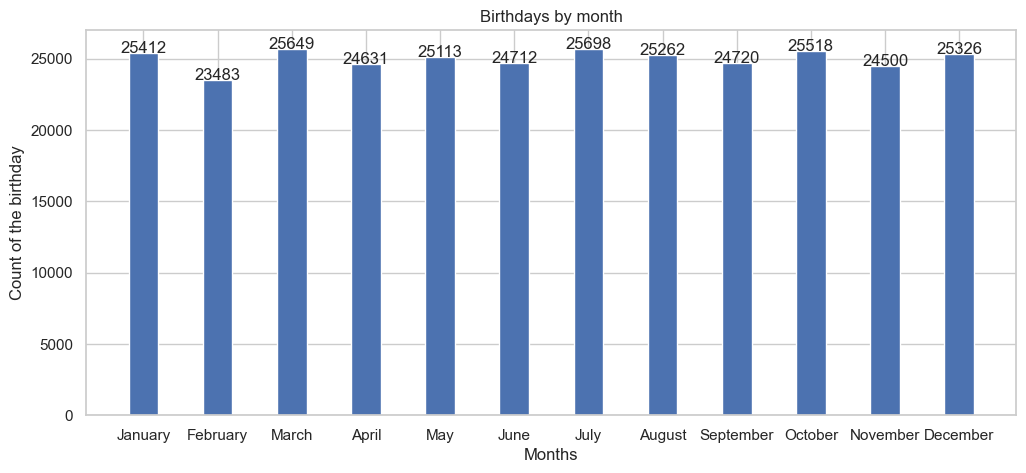

In [214]:
 
months = list(df1.index)
values = list(df1_lst)
  
fig = plt.figure(figsize = (12, 5))
 
plt.bar(months, values, width = 0.4)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
addlabels(months, values)
     
plt.xlabel("Months")
plt.ylabel("Count of the birthday")
plt.title("Birthdays by month")
plt.show()


##### **Question 4**
+ ###### Create a scatter plot showing age vs. current salaries
+ ###### Put in a line of best fit

###### Handle the table for birthday count in each month

In [219]:
Ages = []
Salaries = []
Age_lst = []

for key, value in emp_Dict.items():

    Age_lst.append(round((datetime.datetime.now().date() - value[6]).days/365.242199,1))
    Ages.append(Age)
    Salaries.append(value[5])


In [220]:

randomlist = random.sample(range(0,300024), 1000)

Age_lst_ran = [Age_lst[i] for i in randomlist]

Salaries_ran = [Salaries[i] for i in randomlist]

###### plot a scatter plot

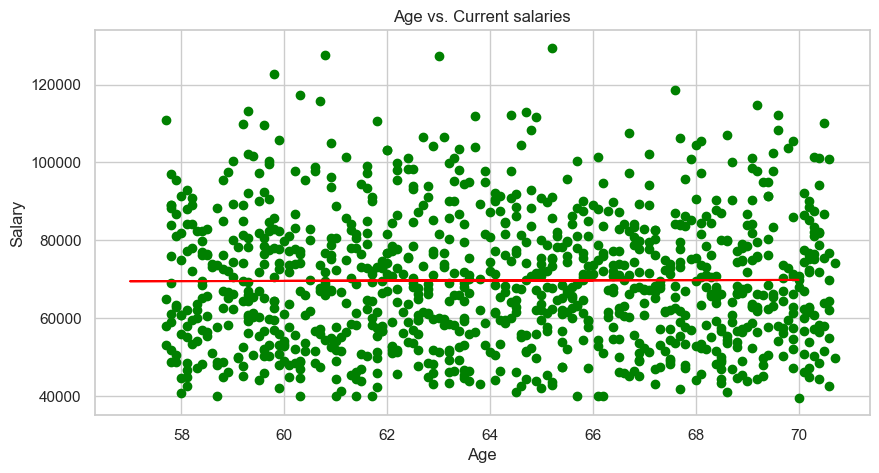

In [237]:
fig = plt.figure(figsize = (10, 5))
plt.scatter(Age_lst_ran, Salaries_ran, c ="green")

plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs. Current salaries")

#As a challenge, can you put in a line of best fit?
Age_lst_fit = np.array([int(i) for i in Age_lst_ran])
Salaries_fit = np.array([int(i) for i in Salaries_ran])

a, b = np.polyfit(Age_lst_fit, Salaries_fit, 1)
plt.plot(Age_lst_fit, a * Age_lst_fit + b, color='red')  
 
# To show the plot
plt.show()




End of the Project